In [1]:
# !pip install pandas plotly matplotlib pingouin nbformat ipykernel scikit-learn optuna ipywidgets gradio

# EDA
import pandas as pd 
import pingouin as pg 
import plotly.express as px
import plotly.figure_factory as ff 
import matplotlib.pyplot as plt 

# Machine Learning
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Otimização de Hiperparâmetros
import optuna

/Users/fulviomascara/.local/share/virtualenvs/classificacao_arvore_decisao-LF00gzBQ/lib/python3.12/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# Carregar Dataset
df_segmento = pd.read_csv('./datasets/dataset_segmento_clientes.csv')

### EDA

In [3]:
# Visualizar os dados
df_segmento.head(10)

,atividade_economica,faturamento_mensal,numero_de_funcionarios,localizacao,idade,inovacao,segmento_de_cliente
0,Comércio,713109.95,12,Rio de Janeiro,6,1,Bronze
1,Comércio,790714.38,9,São Paulo,15,0,Bronze
2,Comércio,1197239.33,17,São Paulo,4,9,Silver
3,Indústria,449185.78,15,São Paulo,6,0,Starter
4,Agronegócio,1006373.16,15,São Paulo,15,8,Silver
5,Serviços,1629562.41,16,Rio de Janeiro,11,4,Silver
6,Serviços,771179.95,13,Vitória,0,1,Starter
7,Serviços,707837.61,16,São Paulo,10,6,Silver
8,Comércio,888983.66,17,Belo Horizonte,10,1,Bronze
9,Indústria,1098512.64,13,Rio de Janeiro,9,3,Bronze


In [4]:
# Estrutura do Dataset
df_segmento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   atividade_economica     500 non-null    object 
 1   faturamento_mensal      500 non-null    float64
 2   numero_de_funcionarios  500 non-null    int64  
 3   localizacao             500 non-null    object 
 4   idade                   500 non-null    int64  
 5   inovacao                500 non-null    int64  
 6   segmento_de_cliente     500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [5]:
# Valores possíveis - Variáveis Categóricas
df_segmento['atividade_economica'].unique()

array(['Comércio', 'Indústria', 'Agronegócio', 'Serviços'], dtype=object)

In [6]:
# Valores possíveis - Variáveis Categóricas
df_segmento['localizacao'].unique()

array(['Rio de Janeiro', 'São Paulo', 'Vitória', 'Belo Horizonte'],
      dtype=object)

In [7]:
# Valores possíveis - Variáveis Categóricas
df_segmento['segmento_de_cliente'].unique()

array(['Bronze', 'Silver', 'Starter', 'Gold'], dtype=object)

In [8]:
# Valores possíveis - Variáveis Categóricas
df_segmento['inovacao'].unique()

array([1, 0, 9, 8, 4, 6, 3, 7, 5, 2])

In [9]:
# Distribuição da Variável Segmento de Cliente (Target)
contagem_target = df_segmento.value_counts('segmento_de_cliente')
contagem_target

segmento_de_cliente
Silver     260
Bronze     202
Starter     22
Gold        16
Name: count, dtype: int64

In [10]:
# Criar uma lista ordenada do target
lista_segmentos = ['Starter', 'Bronze', 'Silver', 'Gold']

In [11]:
# Distribuição da Variável Target - Contagem
px.bar(contagem_target, color=contagem_target.index, category_orders={'segmento_de_cliente': lista_segmentos})

In [12]:
# Distribuição de Variável Target - Percentual
percentual_target = contagem_target / len(df_segmento) * 100
px.bar(percentual_target, color=percentual_target.index, category_orders={'segmento_de_cliente': lista_segmentos})

In [13]:
# Distribuição de Variável Localização
percentual_localizacao = df_segmento.value_counts('localizacao') / len(df_segmento) * 100
px.bar(percentual_localizacao, color=percentual_localizacao.index)

In [14]:
# Distribuição de Variável Atividade Econômica
percentual_atividade = df_segmento.value_counts('atividade_economica') / len(df_segmento) * 100
px.bar(percentual_atividade, color=percentual_atividade.index)

In [15]:
# Distribuição de Variável Inovação
percentual_inovacao = df_segmento.value_counts('inovacao') / len(df_segmento) * 100
px.bar(percentual_inovacao, color=percentual_inovacao.index)

In [16]:
# Tabela de Contingência entre Localização e Target
crosstab_localizacao = pd.crosstab(df_segmento['localizacao'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()

tabela_localizacao = ff.create_table(crosstab_localizacao)

# Mostrar a Crosstab
tabela_localizacao.show()

In [17]:
# Tabela de Contingência entre Atividade e Target
crosstab_atividade = pd.crosstab(df_segmento['atividade_economica'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()

tabela_atividade = ff.create_table(crosstab_atividade)

# Mostrar a Crosstab
tabela_atividade.show()

In [18]:
# Tabela de Contingência entre Inovação e Target
crosstab_inovacao = pd.crosstab(df_segmento['inovacao'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()

tabela_inovacao = ff.create_table(crosstab_inovacao)

# Mostrar a Crosstab
tabela_inovacao.show()

In [19]:
# Distribuição Idade da Empresa
px.histogram(df_segmento, x='idade')

In [20]:
# Distribuição Faturamento Mensal
px.histogram(df_segmento, x='faturamento_mensal')

In [21]:
# BoxPlot entre Idade e Segmento
px.box(df_segmento, x='segmento_de_cliente', y='idade', color='segmento_de_cliente', category_orders={'segmento_de_cliente': lista_segmentos})

In [22]:
# BoxPlot entre Faturamento Mensal e Segmento
px.box(df_segmento, x='segmento_de_cliente', y='faturamento_mensal', color='segmento_de_cliente', category_orders={'segmento_de_cliente': lista_segmentos})

In [23]:
# Teste de Qui-Quadrado de Pearson
# H0 - as variáveis são independentes
# H1 - as variáveis não são independentes
# Se p-value > 0.05, aceita a hipótese nula, caso contrário rejeita
valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'inovacao')

/Users/fulviomascara/.local/share/virtualenvs/classificacao_arvore_decisao-LF00gzBQ/lib/python3.12/site-packages/pingouin/contingency.py:150: UserWarning:

Low count on observed frequencies.

/Users/fulviomascara/.local/share/virtualenvs/classificacao_arvore_decisao-LF00gzBQ/lib/python3.12/site-packages/pingouin/contingency.py:150: UserWarning:

Low count on expected frequencies.

/Users/fulviomascara/.local/share/virtualenvs/classificacao_arvore_decisao-LF00gzBQ/lib/python3.12/site-packages/scipy/stats/_stats_py.py:8073: RuntimeWarning:

divide by zero encountered in power

/Users/fulviomascara/.local/share/virtualenvs/classificacao_arvore_decisao-LF00gzBQ/lib/python3.12/site-packages/scipy/stats/_stats_py.py:8073: RuntimeWarning:

invalid value encountered in multiply

/Users/fulviomascara/.local/share/virtualenvs/classificacao_arvore_decisao-LF00gzBQ/lib/python3.12/site-packages/scipy/stats/_stats_py.py:8070: RuntimeWarning:

divide by zero encountered in divide



In [24]:
# Valor Esperado
# É a frequência que seria esperada se não houvesse associação entre as variáveis
# É calculado utilizando a distribuição assumida no teste qui-quadrado
valor_esperado

inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,21.008,23.028,22.624,19.392,17.372,17.372,21.816,21.412,18.988,18.988
Gold,1.664,1.824,1.792,1.536,1.376,1.376,1.728,1.696,1.504,1.504
Silver,27.040,29.640,29.120,24.960,22.360,22.360,28.080,27.560,24.440,24.440
Starter,2.288,2.508,2.464,2.112,1.892,1.892,2.376,2.332,2.068,2.068


In [25]:
# Valor Observado
# É a frequência real dos dados coletados
valor_observado

inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,36,44,32,22,12,14,15,12,9,6
Gold,0,0,0,0,0,3,0,5,4,4
Silver,10,5,20,25,30,25,38,36,34,37
Starter,6,8,4,1,1,1,1,0,0,0


In [26]:
# Estatísticas
estatisticas.round(5)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,164.29399,27.0,0.0,0.33095,0.99850
1,cressie-read,0.66667,165.49946,27.0,0.0,0.33216,0.99861
2,log-likelihood,0.00000,181.48878,27.0,0.0,0.34784,0.99951
3,freeman-tukey,-0.50000,NaN,27.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.00000,inf,27.0,0.0,inf,NaN
5,neyman,-2.00000,NaN,27.0,NaN,NaN,NaN


As variáveis localizaçao e segmento de cliente são independentes. Qui-Quadrado (p-value = 0.81714)

As variáveis atividade econômica e segmento de cliente são independentes. Qui-Quadrado (p-value = 0.35292)

As variáveis inovação e segmento não são indpendentes. Qui-Quadrado (p-value = 0.0)

### Treinamento do Modelo

In [27]:
# Separar X e y
X = df_segmento.drop(columns=['segmento_de_cliente'])
y = df_segmento['segmento_de_cliente']

In [28]:
# Pipeline
# OneHotEncode nas variáveis categóricas
# Treinamento do Modelo

# Lista de variáveis categóricas
categorical_features = ['atividade_economica', 'localizacao']

# Criar um transformador de variáveis categóricas usando OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Pipeline com Pre-Processor e o Modelo de Arvore de Decisão
dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])

### Validação Cruzada

In [29]:
# Treinar o Modelo com Validação Cruzada, usando StratifiedKFold, dado que as classes estão desbalanceadas

cv_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=51)
metrics_result = cross_validate(dt_model, X, y, cv=cv_folds, scoring=['accuracy'], return_estimator=True)

In [30]:
# Mostrar Retorno do Cross Validation
metrics_result

{'fit_time': array([0.00312519, 0.00187111, 0.00143313]),
 'score_time': array([0.00137973, 0.00082302, 0.00069571]),
 'estimator': [Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(strategy='most_frequent')),
                                                                    ('onehot',
                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                    ['atividade_economica',
                                                     'localizacao'])])),
                  ('classifier', DecisionTreeClassifier())]),
  Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
        

In [31]:
# Média da Acurácia, considerando os 3 splits
metrics_result['test_accuracy'].mean()

0.4739917754851743

In [32]:
# Acurácia 
# total de previsões corretas / total de previsões

### Métricas

In [33]:
# Fazendo predições usando Cross Validation
y_pred = cross_val_predict(dt_model, X, y, cv=cv_folds)

In [34]:
# Avalia o desempenho do modelo
classification_report_str = classification_report(y, y_pred)

print(f'Relatório de Classificação:\n{classification_report_str}')

Relatório de Classificação:
              precision    recall  f1-score   support

      Bronze       0.41      0.36      0.38       202
        Gold       0.00      0.00      0.00        16
      Silver       0.51      0.63      0.57       260
     Starter       0.00      0.00      0.00        22

    accuracy                           0.47       500
   macro avg       0.23      0.25      0.24       500
weighted avg       0.43      0.47      0.45       500



/Users/fulviomascara/.local/share/virtualenvs/classificacao_arvore_decisao-LF00gzBQ/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/fulviomascara/.local/share/virtualenvs/classificacao_arvore_decisao-LF00gzBQ/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/fulviomascara/.local/share/virtualenvs/classificacao_arvore_decisao-LF00gzBQ/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



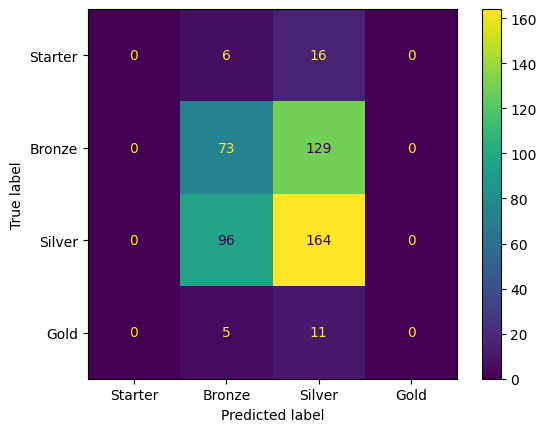

In [35]:
# Mostrar Matriz de Confusão
confusion_matrix_modelo = confusion_matrix(y, y_pred, labels=lista_segmentos)
disp = ConfusionMatrixDisplay(confusion_matrix_modelo, display_labels=lista_segmentos)
disp.plot()

### Tuning de Hiperparâmetros

In [36]:
# Ajustar hiperparâmetros do Modelo usando Optuna
# min_samples_leaf = Mínimo de instâncias requerido para formar uma folha (nó terminal)
# max_depth = Profundidade máxima da árvore

def decisiontree_optuna(trial):

    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_depth = trial.suggest_int('max_depth', 2, 8)

    dt_model.set_params(classifier__min_samples_leaf=min_samples_leaf)
    dt_model.set_params(classifier__max_depth=max_depth)

    scores = cross_val_score(dt_model, X, y, cv=cv_folds, scoring='accuracy')

    return scores.mean()

In [38]:
# Executar a automação de experimentos
estudo_decisiontree = optuna.create_study(direction='maximize')
estudo_decisiontree.optimize(decisiontree_optuna, n_trials=200)

[I 2024-01-24 20:41:11,731] A new study created in memory with name: no-name-a0030200-3b61-44de-a85b-2962940bbdca
[I 2024-01-24 20:41:11,750] Trial 0 finished with value: 0.45398359906692637 and parameters: {'min_samples_leaf': 15, 'max_depth': 5}. Best is trial 0 with value: 0.45398359906692637.
[I 2024-01-24 20:41:11,766] Trial 1 finished with value: 0.4679676790996321 and parameters: {'min_samples_leaf': 18, 'max_depth': 8}. Best is trial 1 with value: 0.4679676790996321.
[I 2024-01-24 20:41:11,780] Trial 2 finished with value: 0.4679676790996321 and parameters: {'min_samples_leaf': 18, 'max_depth': 6}. Best is trial 1 with value: 0.4679676790996321.
[I 2024-01-24 20:41:11,795] Trial 3 finished with value: 0.4620037034365005 and parameters: {'min_samples_leaf': 19, 'max_depth': 2}. Best is trial 1 with value: 0.4679676790996321.
[I 2024-01-24 20:41:11,807] Trial 4 finished with value: 0.45398359906692637 and parameters: {'min_samples_leaf': 6, 'max_depth': 5}. Best is trial 1 with v

In [39]:
# Mostrar melhor resultado e melhor conjunto de hiperparâmetros
print(f'Melhor acurácia: {estudo_decisiontree.best_value}')
print(f'Melhores parâmetros: {estudo_decisiontree.best_params}')

Melhor acurácia: 0.4740518962075848
Melhores parâmetros: {'min_samples_leaf': 1, 'max_depth': 2}


### Visualizar Árvore

In [41]:
# Preparar o Conjunto de Dados para treinar e conseguir visualizar a árvore
X_train_tree = X.copy()
X_train_tree['localizacao_label'] = X_train_tree.localizacao.astype('category').cat.codes
X_train_tree['atividade_economica_label'] = X_train_tree.atividade_economica.astype('category').cat.codes
X_train_tree.drop(columns=['localizacao', 'atividade_economica'], axis=1, inplace=True)
X_train_tree.rename(columns={'localizacao_label': 'localizacao', 'atividade_economica_label': 'atividade_economica'}, inplace=True)
X_train_tree.head(10)


,faturamento_mensal,numero_de_funcionarios,idade,inovacao,localizacao,atividade_economica
0,713109.95,12,6,1,1,1
1,790714.38,9,15,0,2,1
2,1197239.33,17,4,9,2,1
3,449185.78,15,6,0,2,2
4,1006373.16,15,15,8,2,0
5,1629562.41,16,11,4,1,3
6,771179.95,13,0,1,3,3
7,707837.61,16,10,6,2,3
8,888983.66,17,10,1,0,1
9,1098512.64,13,9,3,1,2


In [42]:
# Treinar o modelo com o conjunto de hiperparâmetros ideal

clf_decisiontree = DecisionTreeClassifier(min_samples_leaf=estudo_decisiontree.best_params['min_samples_leaf'],
                                          max_depth=estudo_decisiontree.best_params['max_depth'])

y_train_tree = y.copy()

clf_decisiontree.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'inovacao <= 2.5\ngini = 0.563\nsamples = 500\nvalue = [202, 16, 260, 22]\nclass = Silver'),
 Text(0.25, 0.5, 'faturamento_mensal <= 425959.422\ngini = 0.482\nsamples = 165\nvalue = [112, 0, 35, 18]\nclass = Starter'),
 Text(0.125, 0.16666666666666666, 'gini = 0.26\nsamples = 13\nvalue = [2, 0, 0, 11]\nclass = Gold'),
 Text(0.375, 0.16666666666666666, 'gini = 0.421\nsamples = 152\nvalue = [110, 0, 35, 7]\nclass = Starter'),
 Text(0.75, 0.5, 'faturamento_mensal <= 549601.438\ngini = 0.474\nsamples = 335\nvalue = [90, 16, 225, 4]\nclass = Silver'),
 Text(0.625, 0.16666666666666666, 'gini = 0.459\nsamples = 37\nvalue = [26, 0, 7, 4]\nclass = Starter'),
 Text(0.875, 0.16666666666666666, 'gini = 0.416\nsamples = 298\nvalue = [64, 16, 218, 0]\nclass = Silver')]

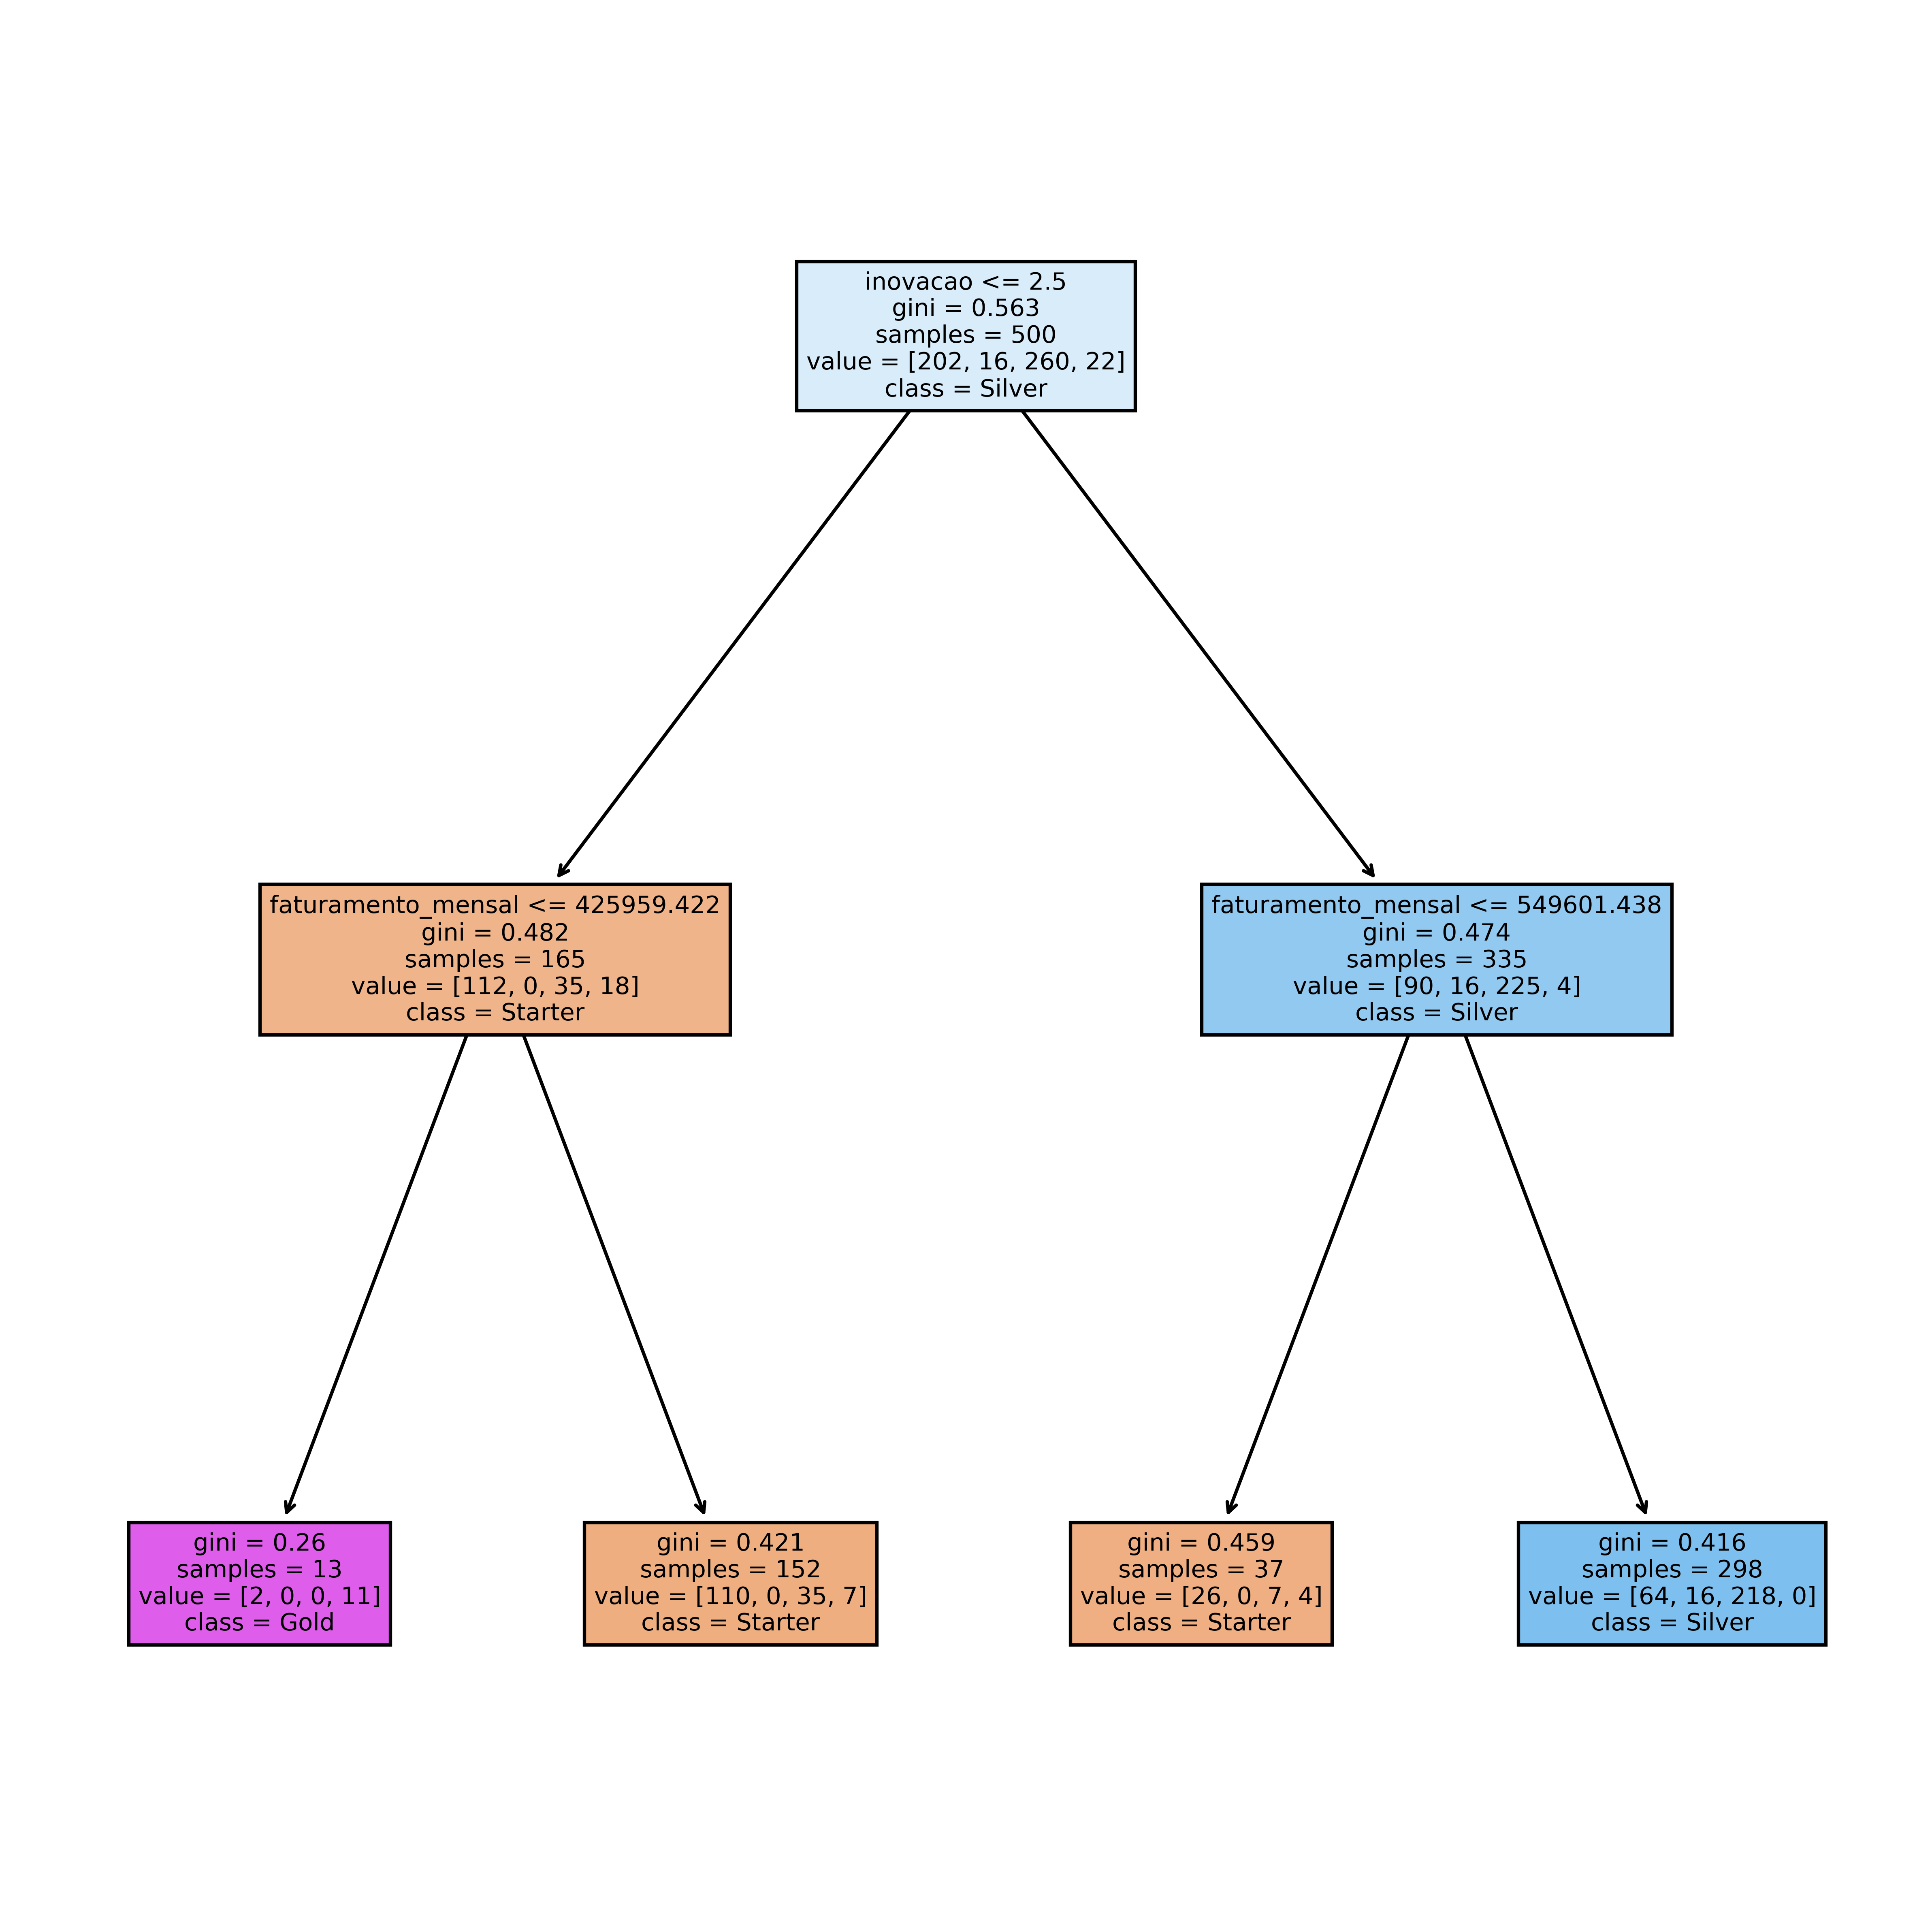

In [43]:
# Visualizar Árvore de Decisão com Plot Tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10,10), dpi=600)

plot_tree(clf_decisiontree,
          feature_names=X_train_tree.columns.to_numpy(),
          class_names=lista_segmentos,
          filled = True)